# Introduction

The graph below shows a calculated probability of two people sharing a birthday given a sample number of people gathered together.

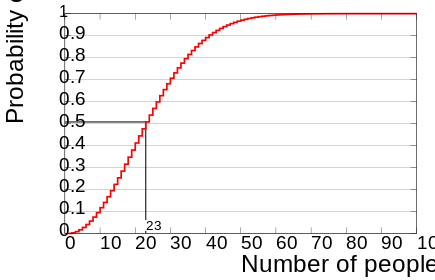

## Overarching Question: What is the birthday paradox and how can we see it in action?

**Why this question?**

The birthday "paradox" states that in a random group of 23 people, there is about a 50 percent chance that two people have the same birthday. In reality, the "paradoxical" nature of this problem comes from it being counterintuituve more than a true paradox. The percent chance obviously goes up with a larger group of people, but given that there are 365 days in a year, it was surprising to me that a group of just 75 people has a 99.9% chance to include two people with the same birthday.

With information being provided that, to me, seems that striking, I felt that I had to find the pattern that must be the backbone of this phenomenon. If I can gather birth data over the course of a year, maybe there is some pattern, some "most likely" date of birth that forces this commonality among a group of people.

# Data

In [70]:
#Include any import statements you will need
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [101]:
file_name = "US_births_2000-2014_SSA.csv"
dataset_path = "data/" + file_name

df = pd.read_csv(dataset_path)

In [4]:
df.head()

year  month  date_of_month  day_of_week  births
0  2000      1              1            6    9083
1  2000      1              2            7    8006
2  2000      1              3            1   11363
3  2000      1              4            2   13032
4  2000      1              5            3   12558

**What is this data about?**

This dataset includes birth data for the dates 1/1/2000 through 12/31/2014. The column data presents the specific date day, month and year, as well as the day of the week (presented as a number 1-7, with 1 being Monday and 7 being Sunday) and the number of births occurring on that given date. The specific day of the week is included in the dataset because FiveThirtyEight (the source of the dataset) was using this particular column in an article about few babies being born on Friday the 13th than expected statistically, but will not be of particular use here.

**Where is this data from?**

The data is available through FiveThirtyEight, but the original data pulled comes from the United States' CDC, NCHS, and SSA. Generally, FiveThirtyEight has a repuation for being center/neutral politically and in this case, there isn't a whole lot of bias with the specific data presented. The data itself is coming from reporting numbers through various government agencies tracking birth data in the US and while it may not accound for some somehow off-the-grid birth occurrances, any baby with a birth certificate should be accounted for in this dataset.

# Methods and Results

## First Research Question: Is there a pattern of seasonality in data showing the number of births each day over a given year?


### Methods

In order to looks for specific patterns, including seasonality, of births throughout the year, we'll need to plot the births on a given day over the course of the year. We have access to the total births on each day in the year 2000, as well as to which day of the week (Monday-Friday) those dates correspond.

We'll start by looking for any patterns in one given year's (2000) worth of data before moving on to looking for these patterns (if they exist) showing up consistently over multiple years and/or changing in some way.


### Results 

In [63]:
years = {}
for x in range(2000, 2015):
    years["births{0}".format(x)] = df[df.year == x]
    
years['births2000']

year  month  date_of_month  day_of_week  births
0    2000      1              1            6    9083
1    2000      1              2            7    8006
2    2000      1              3            1   11363
3    2000      1              4            2   13032
4    2000      1              5            3   12558
..    ...    ...            ...          ...     ...
361  2000     12             27            3   13252
362  2000     12             28            4   13900
363  2000     12             29            5   13607
364  2000     12             30            6    9405
365  2000     12             31            7    7892

[366 rows x 5 columns]

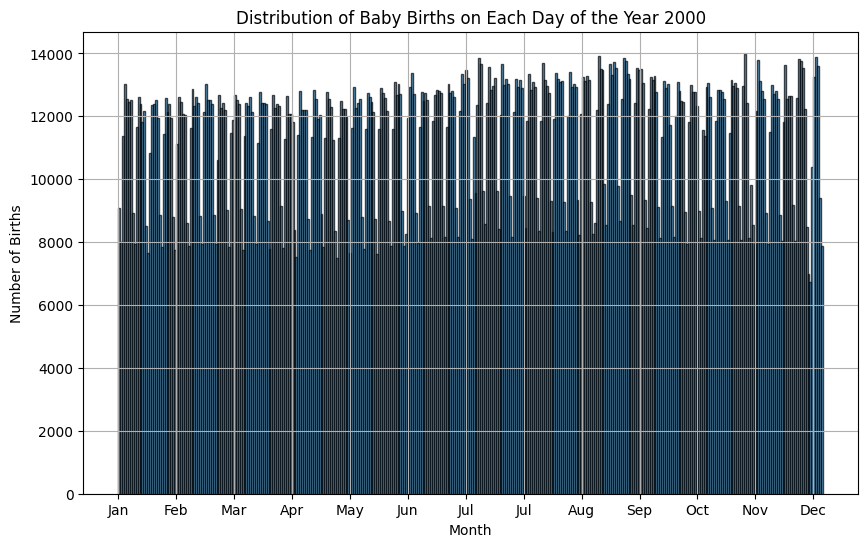

In [83]:
# Set the locator
locator = mdates.MonthLocator()  # every month
# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.figure(figsize=(10, 6))
plt.hist(range(1, 367), bins=366, weights=years['births2000'].births, edgecolor='black', alpha=0.7)
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.xticks(range(1, 366, 30))
plt.xlabel('Month')
plt.ylabel('Number of Births')
plt.title('Distribution of Baby Births on Each Day of the Year 2000')

plt.grid(True)
plt.show()


In [65]:
days_chart = pd.DataFrame(years['births2000'].groupby("day_of_week").births.sum())

days_chart.style \
  .format_index(str.upper, axis=1) \
  .set_caption("Births by Day, Year 2000") \
  .relabel_index(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], axis=0)


In [66]:
months_chart = pd.DataFrame(years['births2000'].groupby("month").births.sum())

months_chart.style \
  .format_index(str.upper, axis=1) \
  .set_caption("Births by Month, Year 2000") \
  .relabel_index(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], axis=0)

The plot above clearly shows some cyclic occurrance, which I thought might be related to the work-week. Turns out, there are upwards of 50% more babies born on a Monday through Friday day of the week than a weekend. There is also a notable (though to what extent is unclear) increase in the size of the spikes the later in the year you go, suggesting that more babies are born in the later months of the year.

## Second Research Question: Does the pattern of seasonality shift over the course of a number of years?


### Methods

Having looked at the birth data over the course of a year, it would be worth looking at the same data for multiple years. The increase in baby births in July/August/September and again in November/December might be an anecdotal artifact, so checking for increases such as those might shed light on whether that pattern is consistent and seasonal or shifts around throughout the year over time. To see this, the same plots will be generated for the available data from 2000-2014.

### Results 

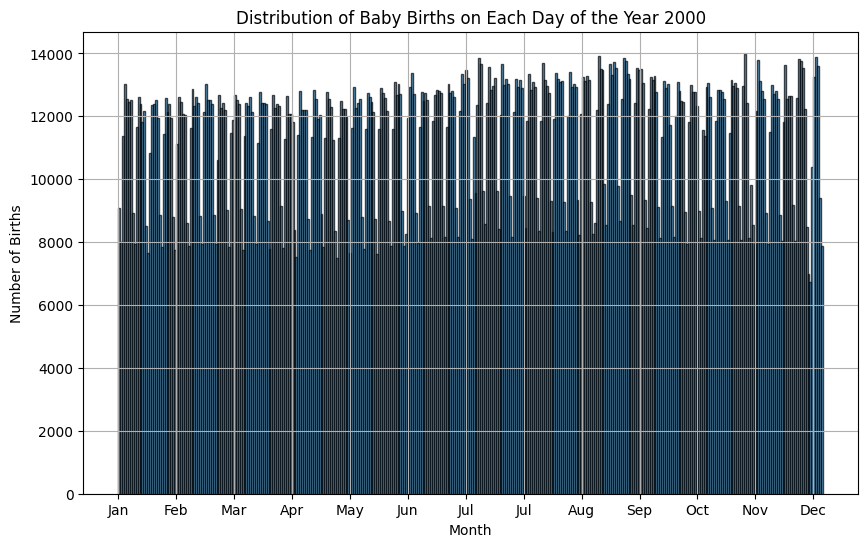

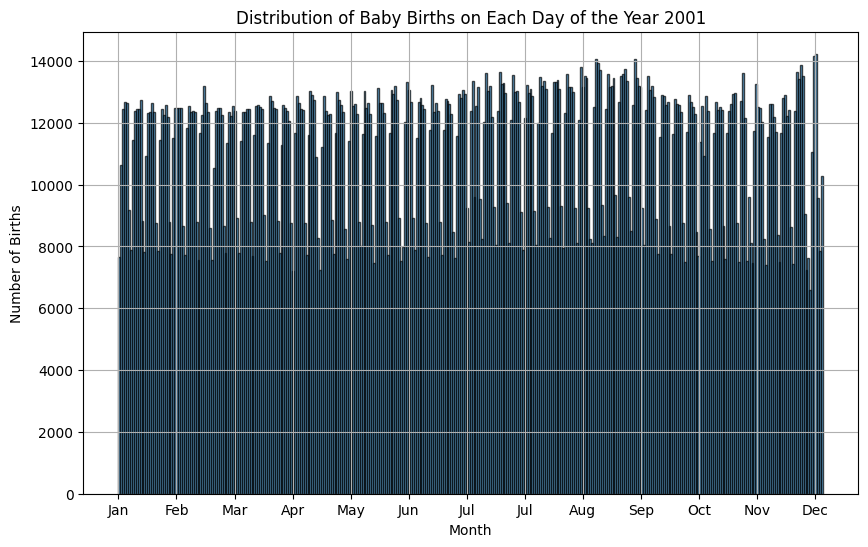

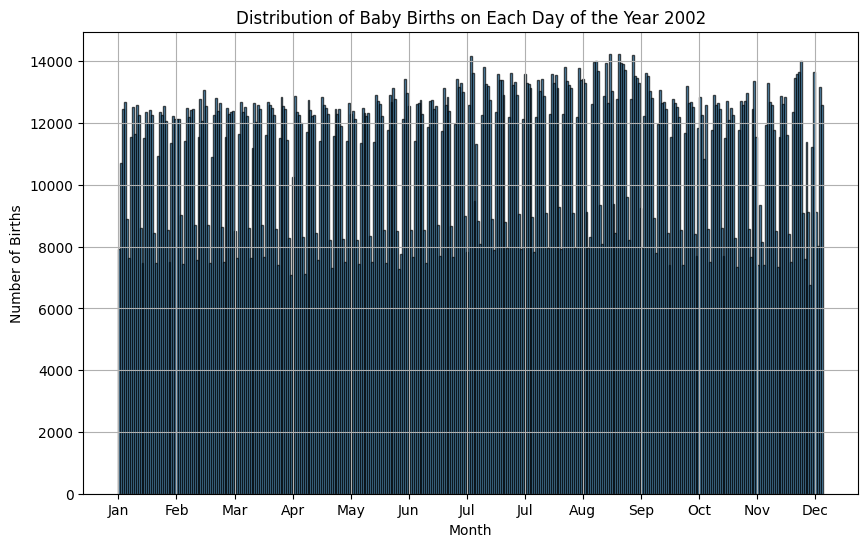

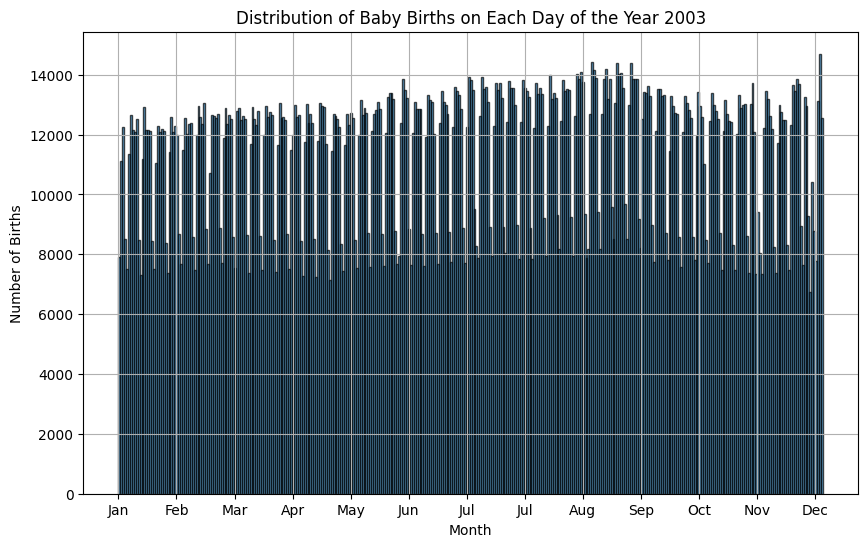

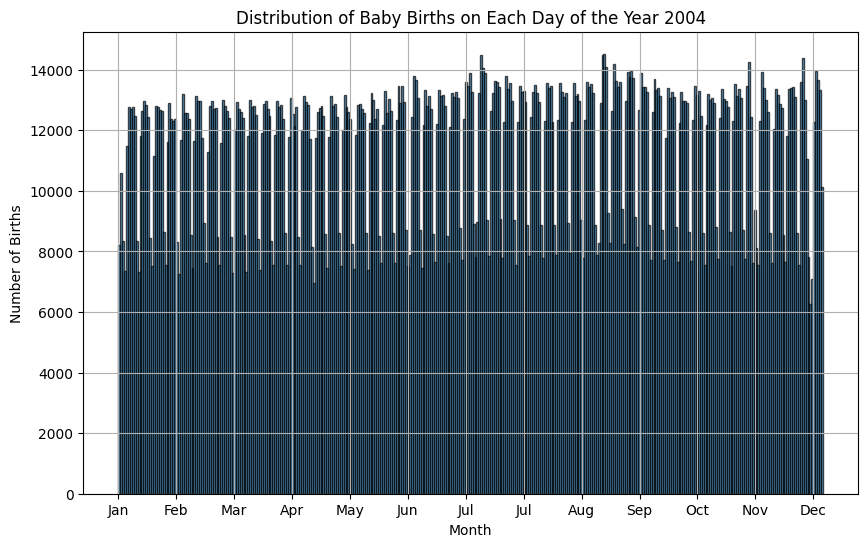

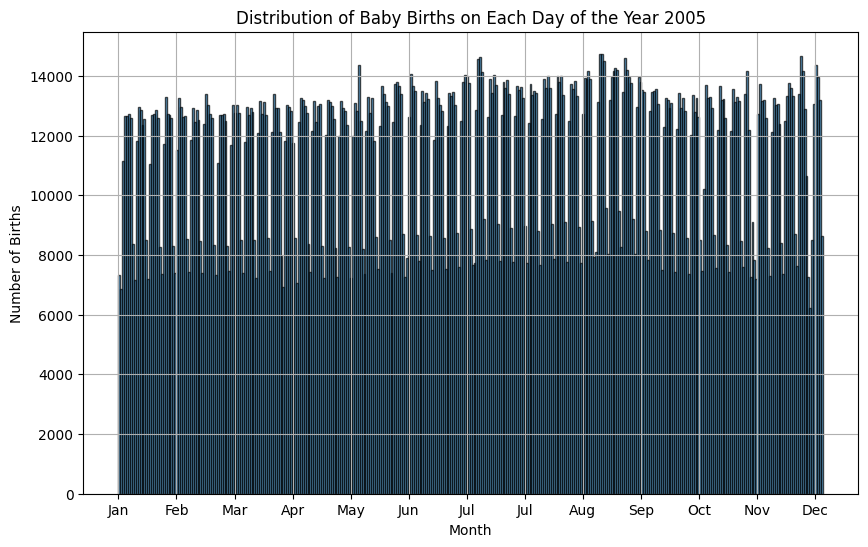

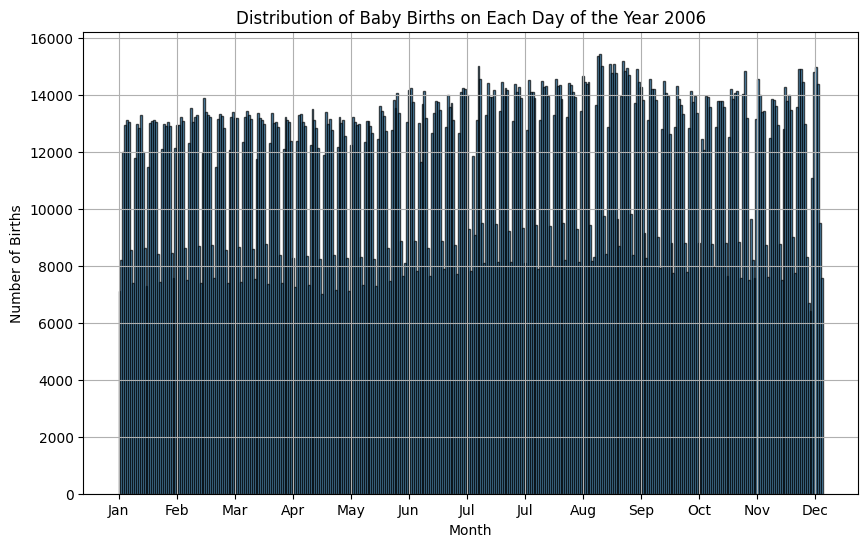

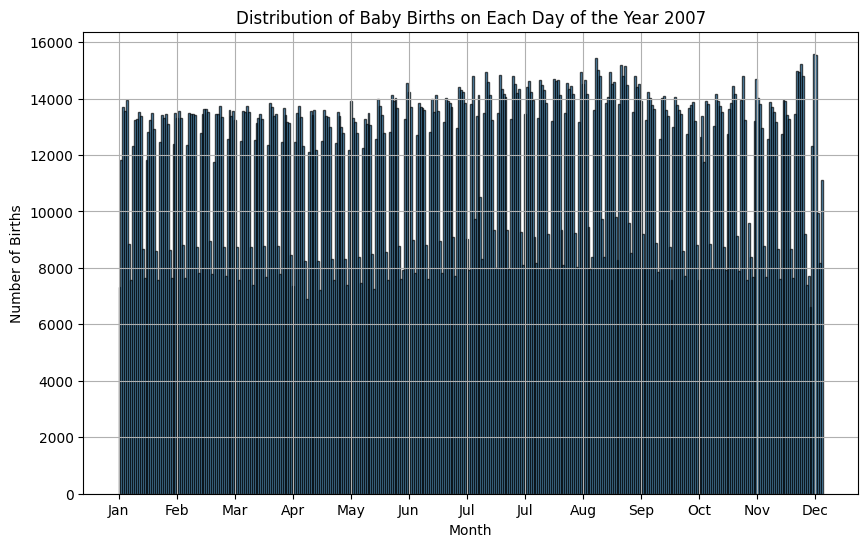

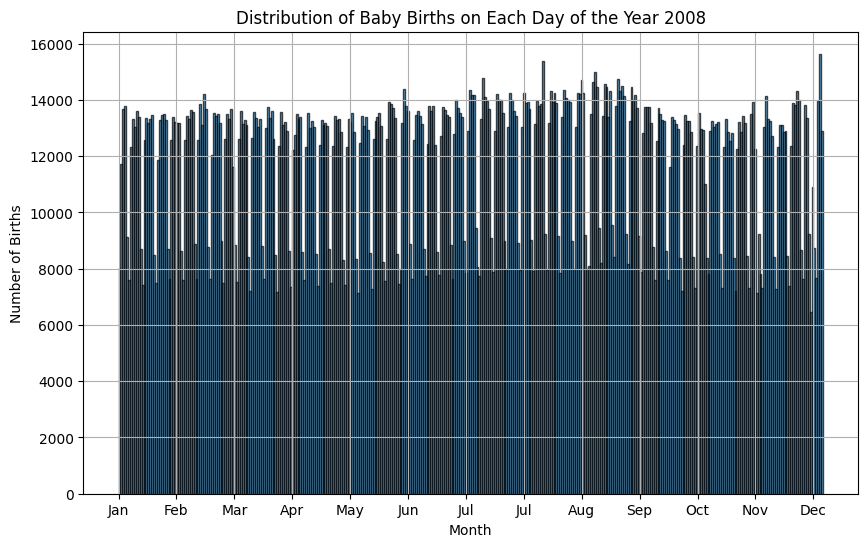

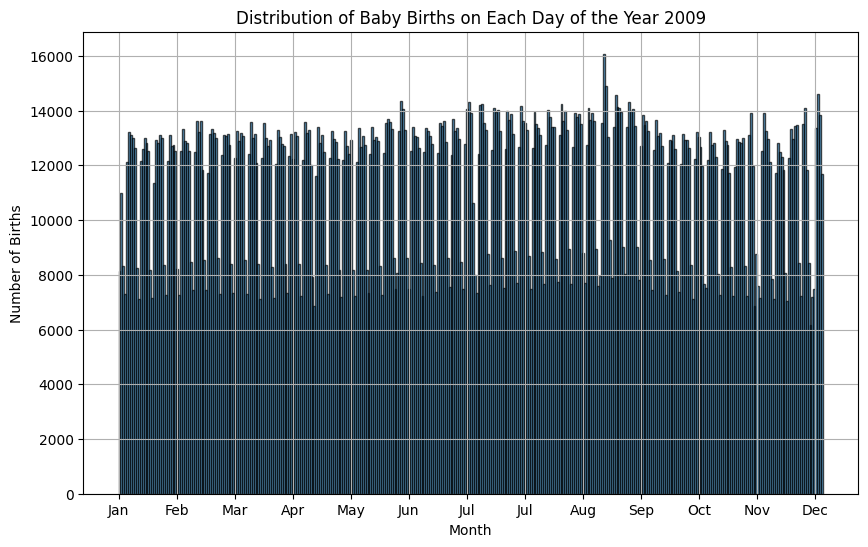

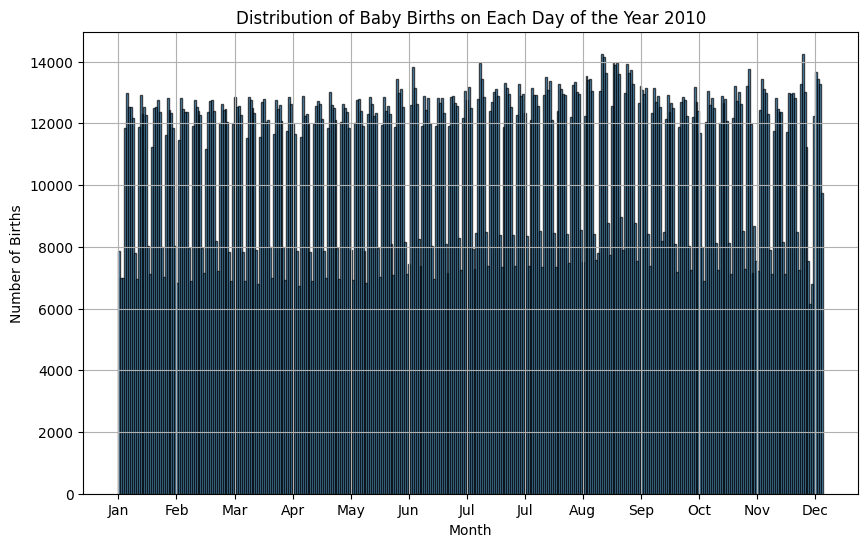

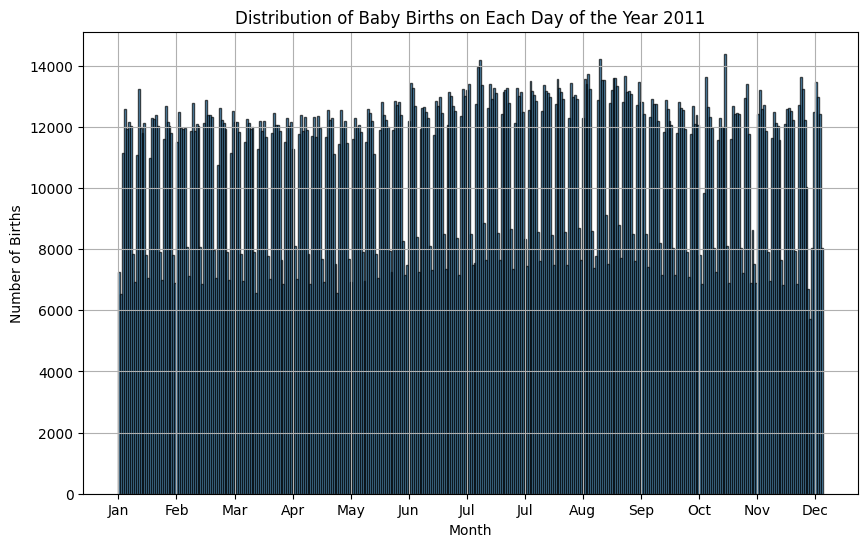

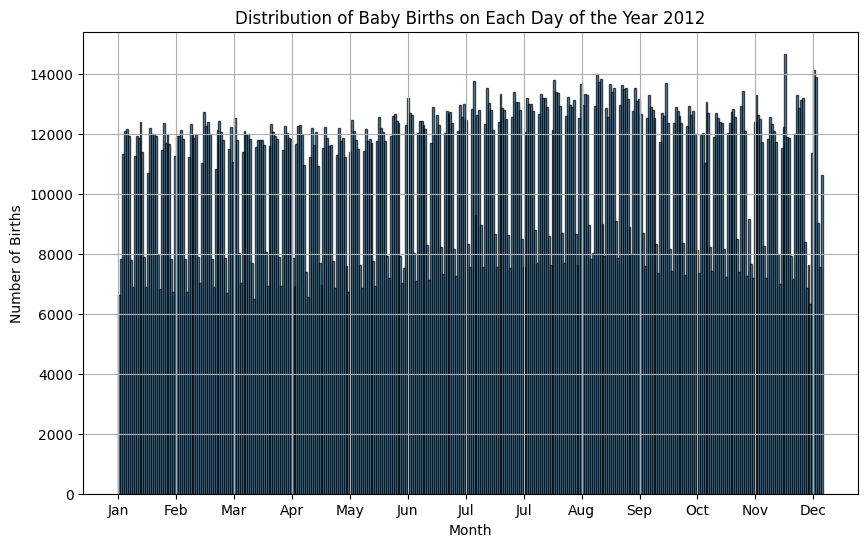

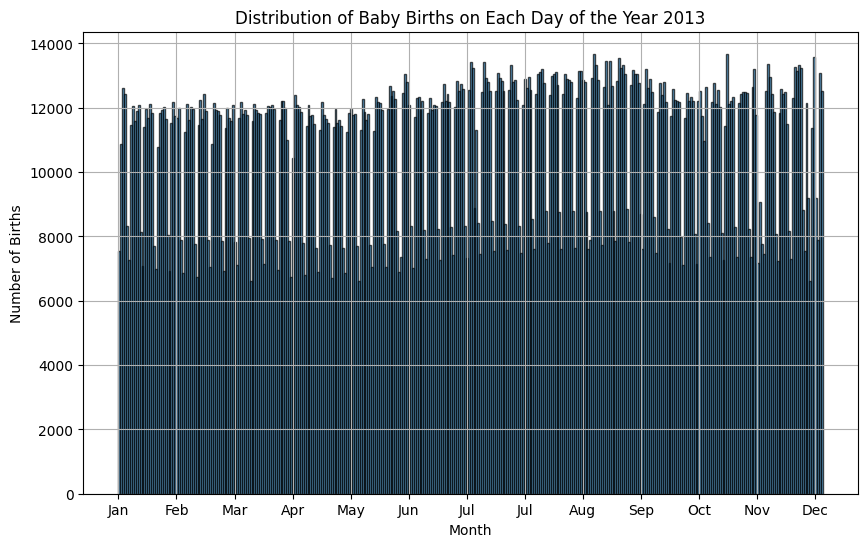

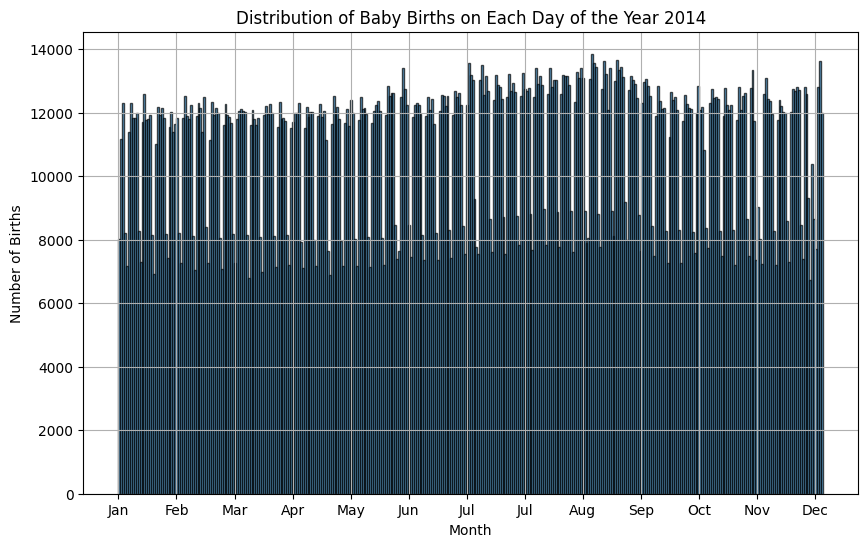

In [84]:
for year in years:
    # Set the locator
    locator = mdates.MonthLocator()  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%b')

    title_year = year[6:]
    plt.figure(figsize=(10, 6))
    if years[year].year.mean() % 4 == 0:
        plt.hist(range(1, 367), bins=366, weights=years[year].births, edgecolor='black', alpha=0.7)
        X = plt.gca().xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)
        plt.xticks(range(1, 366, 30))
    else:
        plt.hist(range(1, 366), bins=365, weights=years[year].births, edgecolor='black', alpha=0.7)
        X = plt.gca().xaxis
        X.set_major_locator(locator)
        # Specify formatter
        X.set_major_formatter(fmt)
        plt.xticks(range(1, 365, 30))
    plt.xlabel('Month')
    plt.ylabel('Number of Births')
    plt.title('Distribution of Baby Births on Each Day of the Year ' + title_year)
    
    plt.grid(True)
    plt.show()

The workweek peakes return in each of these plots, as expected. The late summer boom also occurs yearly, wavering only in the specific date range, but still falling in the same general season. Unfortunately, neither of these patterns seem to shed light directly on how the birthday paradox actually works.

## Third Research Question: How does this data represent the birthday paradox related to the probability of two people having the same birthday?


### Methods

The first thing to do here is to represent the birthday paradox mathematically. It is a probability problem based on the permutations of the total number of birthdays without repetitions and order matters versus the total number of birthdays with repetition and order matters. Taking the ratio of those two quantities, one can find the probability of two people having the same birthday within a group of some known size.

### Results 

To find $V_{nr}$, the total number of birthdays without repetitions, we can use the formula:

$$
V_{nr} = \frac{n!}{(n-k)!}
$$

where $n$ is the number of days in a year and $k$ is the number of people in the group being studied.

For $V_{t}$, the total number of birthdays including any repetition, we use:

$$
V_{t} = n^k
$$

Then to find the probability of any two people in the group having the same birthday, we can take the ratio of these two values and subtract from $1$:

$$
P = 1 - \frac{V_{nr}}{V_{t}}
$$

The subtraction is necessary because without it, we've actually found the probability of no two people in the group having the same birthday. This can be seen by looking at $k$ approaching $0$, where $V_{nr}$ gets smaller and smaller, forcing the ratio of $V_{nr}$ and $V_{t}$ to $0$. This is consistent with the fact that a group of 0 or 1 would have no shared birthdays, while a larger group of people would be more likely to have a shared birthday occur.

Using this method, the probability of having a shared birthday within a group of people can be seen below for a variety of group sizes.

In [96]:
import math

def prob_shared_birthday(num_people):
    Vnr = math.factorial(365) / math.factorial(365 - num_people)
    Vt = 365**num_people
    
    return 1 - (Vnr / Vt)

In [99]:
data = []
num_people = []

min_people = 0
max_people = 100
step_size = 2

for i in range(min_people,max_people+1,step_size):
    num_people.append(i)
    data.append(prob_shared_birthday(i))

Text(0.5, 1.0, 'Probability of at least 1 shared birthday in a group of people')

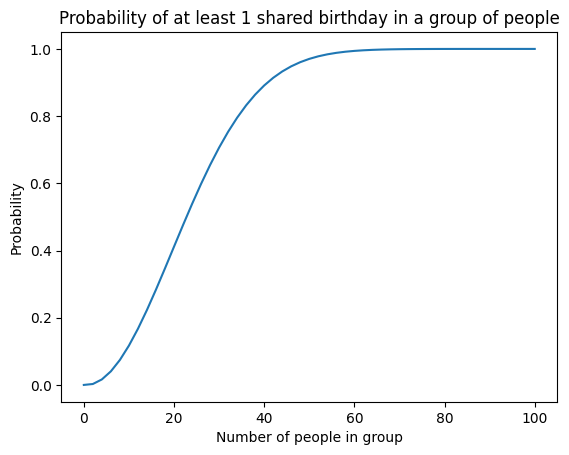

In [100]:
plt.plot(num_people,data)
plt.xlabel('Number of people in group')
plt.ylabel('Probability')
plt.title('Probability of at least 1 shared birthday in a group of people')

It is interesting to note that it only takes 23 people to have a 50:50 chance of two people in the group sharing a birthday and once the group consists of about 70 people, the chance that two people share a birthday is about 99%.

# Discussion

## Considerations

After considering the historical birth data from 2000-2014, there are a few things to note:
1) The frequency periodic peaks are not as unexpected as originally thought; there are 52 of them on each plot and they correspond to the 52 weeks in a year. Given that most babies are likely to be born during the typical workweek (being 5/7 of the days of a week) and any scheduled procedures also occurring during the workweek, those peaks, while shifting slightly on their date ranges year to year, are overall insignificant to the question of this study.

2) The late summer/early fall increase in baby births occurs yearly, coupled by a second increase over a shorter period of time right before year's end.

3) None of these observable patterns actually affect the probability in any way.

## Summary

Most surprising here was the lack of affect of the patterned data on the birthday paradox. It turns out, the reason the birthday paradox exists in the first place is the limited number of options for when a birthday can occur, not necessarily when people are specifically born.

Changing the number of days in a year (for probability testing only, no changes to the current calendar have been adopted globally) from 365 to 400 reduces the probability of two people in a group of 20 sharing a birthday from about 50% to about 30%, which shows me that the available birthday options plays a huge role in why this "paradox" exists in the first place.

Related to that finding, the reason for the "paradox" name does not have to do with the phenomenon being paradoxical in any way, but rather the system is counterintuitive to most, especially given that such a small group of people (23, for example) gives such a large chance (50%) of including two people with a shared birthday.

As far as future impacts, this study was a test in whether I can control my own biases, as I wanted to find some answer to why the birthday paradox exists in the historical birth data that I had access to, and try as I might to find some pattern that explained what I was looking for, I had to accept the fact that no real effect existed and the system could be explained by mathematics.